In [2]:
#Importing Necessary Libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(style="whitegrid", palette="rainbow")

In [3]:
#Data Pre-processing Tasks

df=pd.read_csv(r'loan.csv',low_memory=False)
print("The column values in the dataframe are: ", list(df), "\n")
print("The count column values in the dataframe are: ", len(df.columns), "\n")

df = df.loc[:, df.isnull().mean() < .95] #All columns with more than 95% NaN values are dropped
df=df.drop('url', 1) #URL is not a feature which could determine credit risk
df=df.drop('desc', 1) # As Text Analysis is not in the scope of the project, description is dropped

print("The column values of the dataframe after dropping columns are: ", list(df), "\n")
print("The count column values in the dataframe after dropping are: ", len(df.columns),  "\n")

The column values in the dataframe are:  ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6

C:\Users\hroha\AppData\Local\Temp/ipykernel_5728/1451728366.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop('url', 1) #URL is not a feature which could determine credit risk


The column values of the dataframe after dropping columns are:  ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'] 

The count column values in the dataframe af

C:\Users\hroha\AppData\Local\Temp/ipykernel_5728/1451728366.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop('desc', 1) # As Text Analysis is not in the scope of the project, description is dropped


In [4]:
#Understanding the Distribution of data based on loan status

status_count = df[['id','loan_status']].groupby(['loan_status']).size().reset_index(name = 'count of people')
total_loans = status_count['count of people'].sum()
status_count['percentage(%)'] = ((status_count['count of people'] / total_loans)*100).astype('float')
print(status_count)

                                         loan_status  count of people  \
0                                        Charged Off            45248   
1                                            Current           601779   
2                                            Default             1219   
3  Does not meet the credit policy. Status:Charge...              761   
4  Does not meet the credit policy. Status:Fully ...             1988   
5                                         Fully Paid           207723   
6                                    In Grace Period             6253   
7                                             Issued             8460   
8                                  Late (16-30 days)             2357   
9                                 Late (31-120 days)            11591   

   percentage(%)  
0       5.099061  
1      67.815330  
2       0.137371  
3       0.085758  
4       0.224031  
5      23.408600  
6       0.704659  
7       0.953369  
8       0.265614  
9     

In [5]:
#Understanding the Data-types of all columns
df.dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths           

In [6]:
#Descriptive Statistics for each numerical column (Mean, Median, Count, Quartile Range)

pd.set_option('display.max_columns', None)
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,887350.000000,8.171030e+05,8.171030e+05,8.171030e+05
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,0.004991,2.257026e+02,1.394582e+05,3.206862e+04
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,0.077625,1.031137e+04,1.537500e+05,3.749826e+04
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,1.0,0.000000,0.000000e+00,2.985300e+04,1.390000e+04
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,1.0,0.000000,0.000000e+00,8.055900e+04,2.370000e+04
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.082900e+04,73.600000,32.000000,13659.055000,13654.050000,10616.814230,10565.690000,8000.000000,2238.265000,0.000000,0.000000,0.000000,831.245000,0.000000,61.000000,1.0,0.000000,0.000000e+00,2.082050e+05,3.980000e+04
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,33.000000,188.000000,129.000000,90.000000,86.000000,2.904836e+06,892.300000,169.000000,49372.860000,49372.860000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36475.590000,20.000000,188.000000,1.0,14.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [7]:
#Checking Remaining NaN values to fill

df.isna().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_l

In [8]:
#Further Data Cleaning

#Dropping rows for 3 parameters where rows have NaN, as this is less than 1% of the dataset: tot_coll_amt, tot_cur_bal,total_rev_hi_lim

df = df[df['tot_coll_amt'].notna()]
df = df[df['tot_cur_bal'].notna()]
df = df[df['total_rev_hi_lim'].notna()]

#Fill Approriate Values for NaN values for non-number values

df[['emp_length','title','last_pymnt_d','next_pymnt_d','last_credit_pull_d']] = df[['emp_length','title','last_pymnt_d','next_pymnt_d','last_credit_pull_d']].replace(np.nan, 'Unknown', regex=True)
df['emp_title']=df['emp_title'].replace(np.nan,'Other',regex=True)

#Fill Approriate Values for NaN values for numerical values, in this case as the percentage is low, we are choosing the mean value

df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna((df['mths_since_last_delinq'].mean()))
df['mths_since_last_record'] = df['mths_since_last_record'].fillna((df['mths_since_last_record'].mean()))
df['revol_util'] = df['revol_util'].fillna((df['revol_util'].mean()))
df['mths_since_last_major_derog'] = df['mths_since_last_major_derog'].fillna((df['mths_since_last_major_derog'].mean()))


#All NaN values have been taken care of now
df.isna().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal 

In [10]:
#Creating dataframes for different loan statuses (Charged Off, Default, Policy, Fully Paid)

charged_off = df.loc[df['loan_status'] == 'Charged Off']
default = df.loc[df['loan_status'] == 'Default']
nopol_charged_off = df.loc[df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off']
fully_paid = df.loc[df['loan_status'] == 'Fully Paid']

#Categorizing loan-status into risky, moderate and non-risky

risky_loan_category=['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off']
moderate_risky_loan_category=["In Grace Period","Late (16-30 days)","Late (31-120 days)"]
non_risky_loan_category=["Current","Does not meet the credit policy. Status:Fully Paid","Fully Paid","Issued"]

#Creating dataframes for above categories

risky_loans_df=df.loc[df['loan_status'].isin(risky_loan_category)]
non_risky_loans_df=df.loc[df['loan_status'].isin(non_risky_loan_category)]
moderate_risky_loans_df=df.loc[df['loan_status'].isin(moderate_risky_loan_category)]

In [11]:
risky_loans_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,3.643000e+04,3.643000e+04,36430.000000,36430.000000,36430.000000,36430.000000,36430.000000,3.643000e+04,36430.000000,36430.000000,36430.000000,36430.000000,36430.000000,36430.000000,36430.000000,3.643000e+04,36430.000000,36430.000000,36430.000000,36430.000000,36430.000000,36430.000000,36430.000000,36430.000000,36430.000000,36430.000000,36430.000000,36430.000000,36430.000000,36430.000000,36430.0,36430.000000,36430.000000,3.643000e+04,3.643000e+04
mean,1.427004e+07,1.589486e+07,15004.032391,15003.772303,14997.286892,16.470941,457.807281,6.595087e+04,19.322963,0.308674,0.969668,33.883734,71.386779,11.420889,0.169201,1.533370e+04,59.755336,24.862750,385.452743,385.342611,6075.090440,6072.213650,3084.762752,2088.468181,2.149157,899.710351,95.712238,477.795862,0.010568,43.746193,1.0,0.005023,133.869146,1.143495e+05,2.640412e+04
std,1.245758e+07,1.319287e+07,8369.445274,8368.971074,8365.414038,4.268539,247.040962,6.047898e+04,7.960103,0.852290,1.131472,15.036182,10.895246,4.968554,0.487429,1.823560e+04,22.585600,11.549539,2496.220695,2495.532783,4982.845321,4980.107934,3022.452415,2082.749677,9.605373,1536.426512,231.616723,664.803476,0.108510,10.914060,0.0,0.079817,1300.614497,1.277547e+05,2.541921e+04
min,5.716700e+04,1.372250e+05,1000.000000,1000.000000,950.000000,5.930000,27.850000,7.200000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,5.175951e+06,6.186926e+06,8725.000000,8725.000000,8725.000000,13.350000,282.280000,4.171975e+04,13.440000,0.000000,0.000000,33.000000,70.271492,8.000000,0.000000,6.553250e+03,44.000000,16.000000,0.000000,0.000000,2488.855000,2487.572500,1052.180000,700.542500,0.000000,0.000000,0.000000,267.240000,0.000000,44.104838,1.0,0.000000,0.000000,2.568100e+04,1.240000e+04
50%,9.756210e+06,1.143705e+07,13475.000000,13475.000000,13475.000000,16.290000,404.970000,5.700000e+04,19.300000,0.000000,1.000000,33.940493,70.271492,11.000000,0.000000,1.160600e+04,61.500000,23.000000,0.000000,0.000000,4725.970000,4724.010000,2175.140000,1431.695000,0.000000,0.000000,0.000000,398.510000,0.000000,44.104838,1.0,0.000000,0.000000,5.958900e+04,2.050000e+04
75%,2.014796e+07,2.240134e+07,20000.000000,20000.000000,20000.000000,19.220000,588.695000,8.000000e+04,25.240000,0.000000,2.000000,33.940493,70.271492,14.000000,0.000000,1.953000e+04,77.500000,31.000000,0.000000,0.000000,8236.795000,8235.725000,4109.547500,2717.947500,0.000000,1391.545000,30.663525,590.462500,0.000000,44.104838,1.0,0.000000,0.000000,1.721805e+05,3.320000e+04
max,6.051698e+07,6.453775e+07,35000.000000,35000.000000,35000.000000,28.990000,1424.570000,8.706582e+06,39.980000,18.000000,6.000000,152.000000,119.000000,76.000000,12.000000,1.746716e+06,129.400000,110.000000,35000.000000,35000.000000,40154.500000,40125.870000,34483.270000,20295.760000,358.680000,33520.270000,5694.093600,34833.350000,4.000000,152.000000,1.0,5.000000,95806.000000,3.437283e+06,1.998700e+06


In [12]:
non_risky_loans_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,7.606860e+05,7.606860e+05,760686.000000,760686.000000,760686.000000,760686.000000,760686.000000,7.606860e+05,760686.000000,760686.000000,760686.000000,760686.000000,760686.000000,760686.000000,760686.000000,7.606860e+05,760686.000000,760686.000000,760686.000000,760686.000000,760686.000000,760686.000000,760686.000000,760686.000000,760686.000000,760686.0,760686.0,760686.000000,760686.000000,760686.000000,760686.0,760686.000000,7.606860e+05,7.606860e+05,7.606860e+05
mean,3.626946e+07,3.906587e+07,14979.800568,14979.793042,14973.469769,13.088526,442.082640,7.610475e+04,18.413952,0.326670,0.652332,33.974567,70.216469,11.715399,0.209590,1.727224e+04,55.010330,25.546685,9451.947516,9448.161962,7177.318303,7174.088254,5521.690748,1655.472848,0.154710,0.0,0.0,2222.164383,0.015782,44.127780,1.0,0.005375,2.301158e+02,1.410489e+05,3.247403e+04
std,2.166019e+07,2.280226e+07,8446.057909,8446.058148,8442.722655,4.336427,243.867801,6.507953e+04,18.267502,0.880857,0.943741,15.451763,10.997210,5.370700,0.606314,2.292932e+04,23.495858,11.859833,8454.575406,8451.096916,7704.407598,7700.555910,6565.879059,1982.003803,2.443456,0.0,0.0,4941.262728,0.140890,11.562258,0.0,0.080497,1.067883e+04,1.550509e+05,3.814499e+04
min,5.670500e+04,7.082500e+04,1000.000000,1000.000000,900.000000,5.320000,23.260000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.353783e+07,1.549962e+07,8400.000000,8400.000000,8400.000000,9.760000,265.680000,4.600000e+04,12.110000,0.000000,0.000000,31.000000,70.271492,8.000000,0.000000,6.609000e+03,37.800000,17.000000,2078.167500,2077.190000,1716.110000,1715.420000,1108.340000,405.640000,0.000000,0.0,0.0,282.440000,0.000000,44.104838,1.0,0.000000,0.000000e+00,3.012700e+04,1.410000e+04
50%,3.968221e+07,4.250503e+07,13500.000000,13500.000000,13500.000000,12.850000,387.150000,6.500000e+04,17.870000,0.000000,0.000000,33.940493,70.271492,11.000000,0.000000,1.208900e+04,55.700000,24.000000,7969.660000,7965.130000,4470.770000,4469.560000,2996.125000,1008.690000,0.000000,0.0,0.0,462.610000,0.000000,44.104838,1.0,0.000000,0.000000e+00,8.231250e+04,2.400000e+04
75%,5.612832e+07,5.978968e+07,20000.000000,20000.000000,20000.000000,15.770000,578.710000,9.000000e+04,24.280000,0.000000,1.000000,33.940493,70.271492,14.000000,0.000000,2.121600e+04,73.100000,32.000000,14633.640000,14631.310000,10064.200000,10060.847500,7450.100000,2125.047500,0.000000,0.0,0.0,811.440000,0.000000,44.104838,1.0,0.000000,0.000000e+00,2.106268e+05,4.030000e+04
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,8.000000,188.000000,121.000000,90.000000,86.000000,2.904836e+06,892.300000,169.000000,49372.860000,49372.860000,56087.909920,56047.850000,35000.000000,21840.000000,252.800000,0.0,0.0,36475.590000,20.000000,188.000000,1.0,14.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [25]:
df.home_ownership.unique()

array(['OWN', 'RENT', 'MORTGAGE', 'NONE', 'OTHER', 'ANY'], dtype=object)

NameError: name 'unique_cols' is not defined

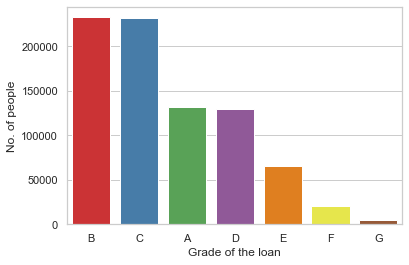

In [9]:
#Visualizations and Insights

ax=sns.countplot(x='grade', data=df, palette="Set1")
ax.set(xlabel='Grade of the loan', ylabel='No. of people')
plt.show()

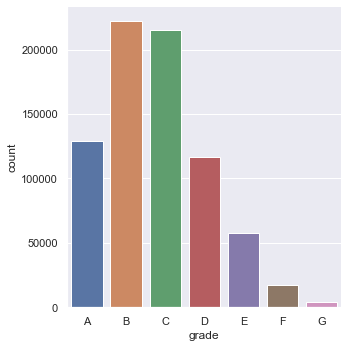

In [14]:
#Plotting Grades and No. of people for various loan categories

#Non-Risky
non_risky_loans_temp=non_risky_loans_df[['id','grade']].groupby(['grade']).size().reset_index(name='count')
sns.catplot(x="grade", y="count", kind="bar", data=non_risky_loans_temp)
plt.show()

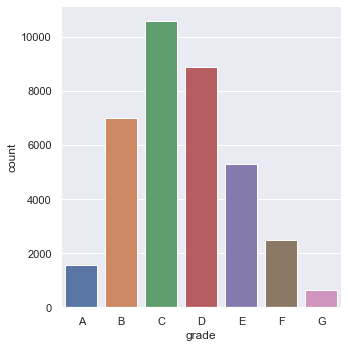

In [15]:
#Risky
risky_loans_temp=risky_loans_df[['id','grade']].groupby(['grade']).size().reset_index(name='count')
sns.catplot(x="grade", y="count", kind="bar", data=risky_loans_temp)
plt.show()

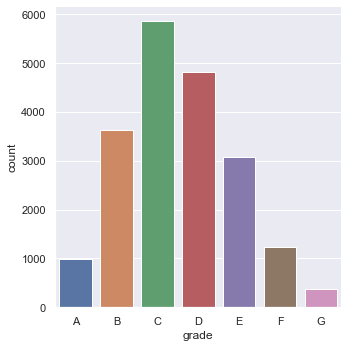

In [16]:
#Moderate-Risky

moderate_risky_loans_temp=moderate_risky_loans_df[['id','grade']].groupby(['grade']).size().reset_index(name='count')
sns.catplot(x="grade", y="count", kind="bar", data=moderate_risky_loans_temp)
plt.show()

c:\users\hroha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


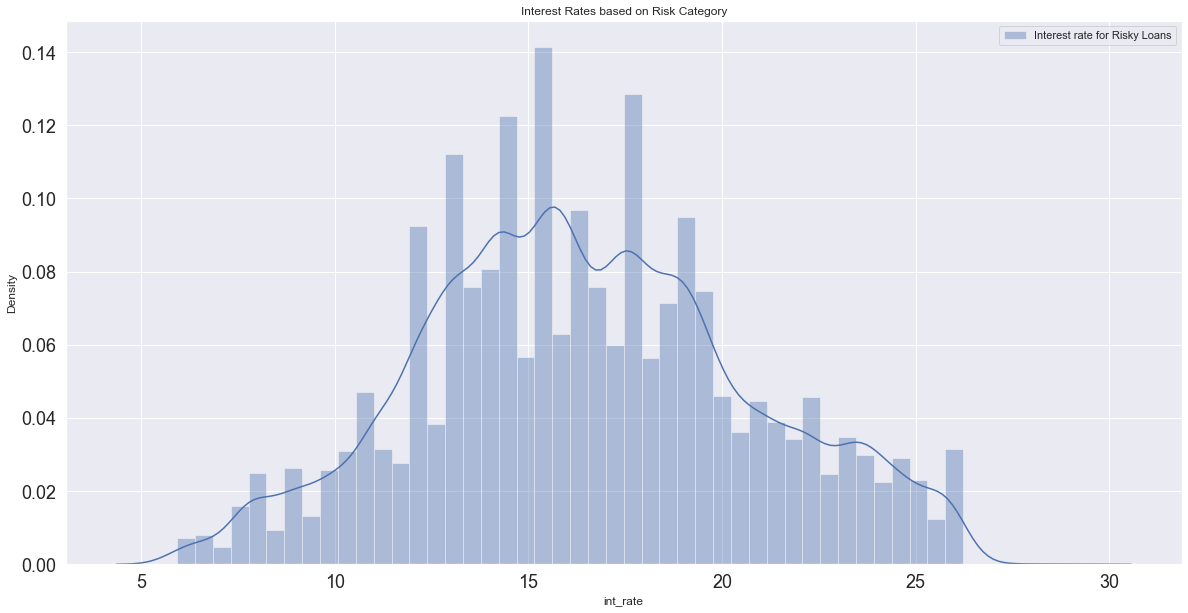

In [10]:
#Plotting Interest Rates for Various Loan Categories

#Risky Loans
risky_interest_rate = risky_loans_df['int_rate']

sns.set(rc ={'figure.figsize':(20,10)})
sns.distplot(risky_interest_rate, label = 'Interest rate for Risky Loans', hist = True)

plt.legend()
plt.title('Interest Rates based on Risk Category')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

c:\users\hroha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


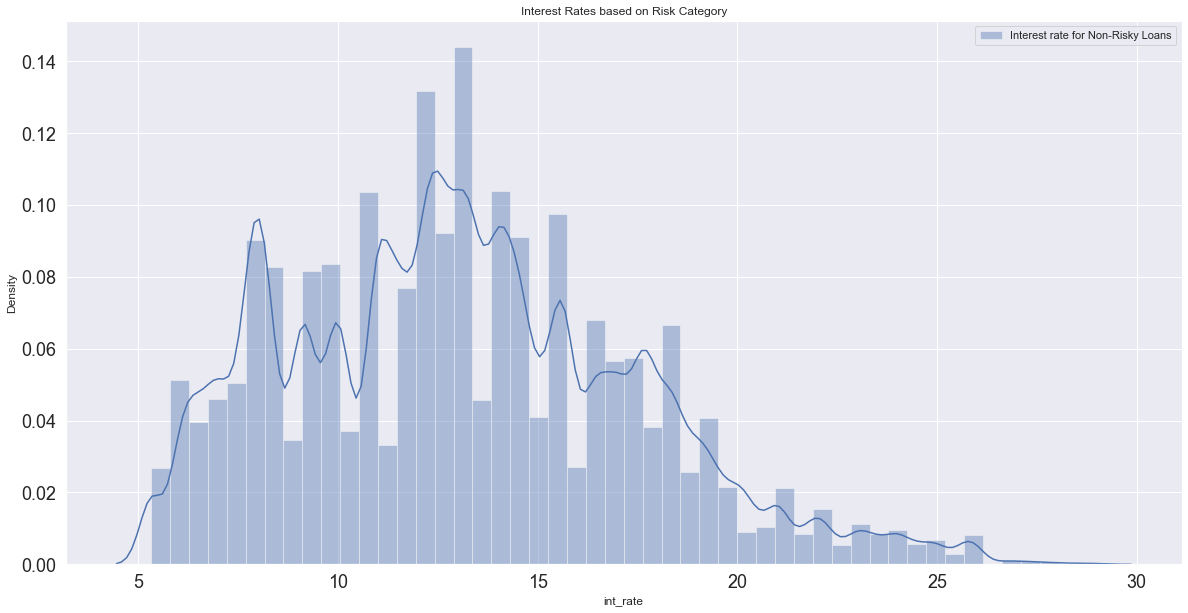

In [11]:
#Non-Risky Loans

non_risky_interest_rate = non_risky_loans_df['int_rate']

sns.set(rc ={'figure.figsize':(20,10)})

sns.distplot(non_risky_interest_rate, label = 'Interest rate for Non-Risky Loans', hist = True)

plt.legend()
plt.title('Interest Rates based on Risk Category')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

c:\users\hroha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


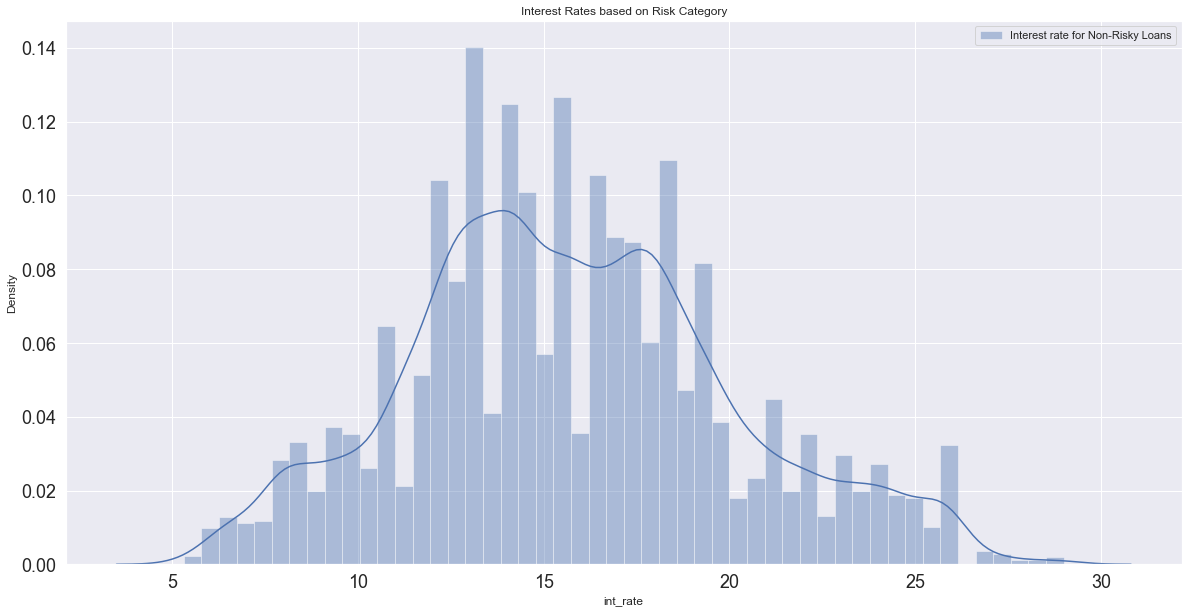

In [13]:
#Moderate Risky Loans

moderate_risky_interest_rate = moderate_risky_loans_df['int_rate']

sns.set(rc ={'figure.figsize':(20,10)})

sns.distplot(moderate_risky_interest_rate, label = 'Interest rate for Non-Risky Loans', hist = True)

plt.legend()
plt.title('Interest Rates based on Risk Category')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [17]:
#Descriptive Statistics for Annual Income based on Loan Status

#Risky
risky_loans_df['annual_inc'].describe()

count    7.606860e+05
mean     7.610475e+04
std      6.507953e+04
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

In [18]:
#Moderate
moderate_risky_loans_df['annual_inc'].describe()

count    1.998700e+04
mean     7.219158e+04
std      7.986288e+04
min      4.524000e+03
25%      4.500000e+04
50%      6.000000e+04
75%      8.500000e+04
max      8.900060e+06
Name: annual_inc, dtype: float64

In [19]:
#Non-Risky
non_risky_loans_df['annual_inc'].describe()

count    7.606860e+05
mean     7.610475e+04
std      6.507953e+04
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

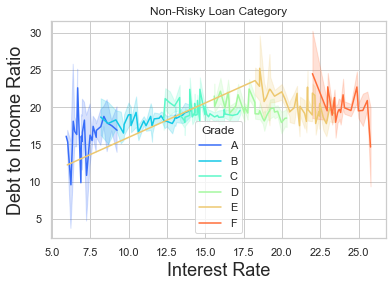

In [20]:
#Plotting Interest Rate Vs Debt-Income Ratio for various Grades of loan

sns.lineplot(x="int_rate", y="dti",
             hue="grade",
             data=risky_loans_df,hue_order = ['A', 'B', 'C','D','E','F'])
plt.legend(title='Grade')
plt.title("Non-Risky Loan Category")
plt.xlabel('Interest Rate', fontsize=18)
plt.ylabel('Debt to Income Ratio', fontsize=18)
plt
plt.gcf()
plt.savefig('First Slide.png')

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

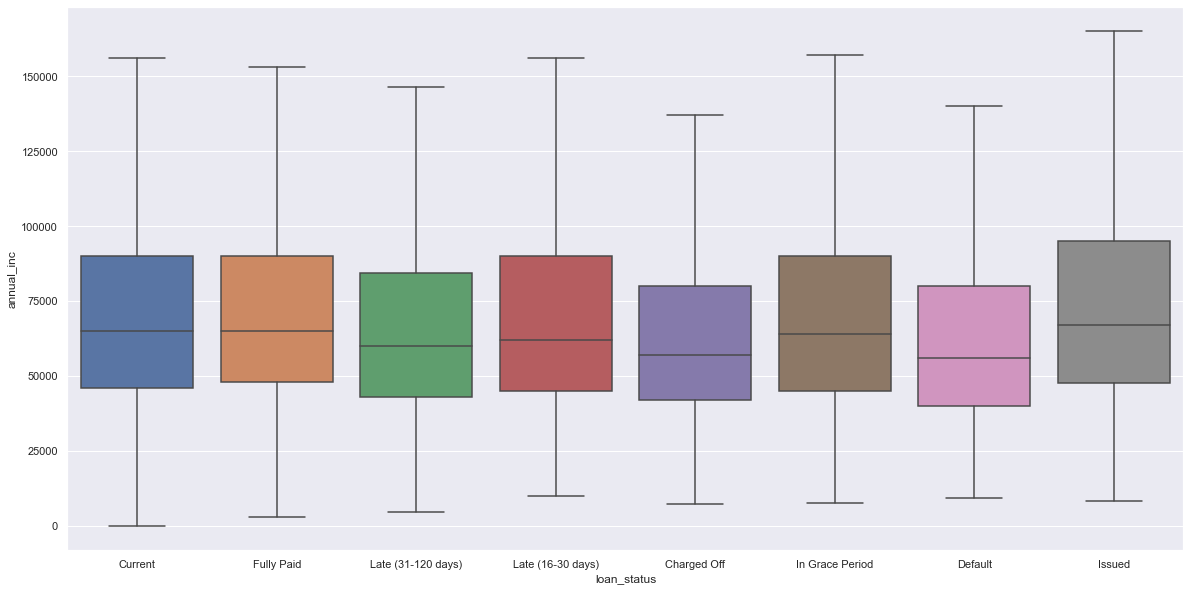

In [21]:
#Box Plot for loan-staus and annual income

sns.boxplot(x="loan_status", y="annual_inc", data=df, showfliers=False)

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

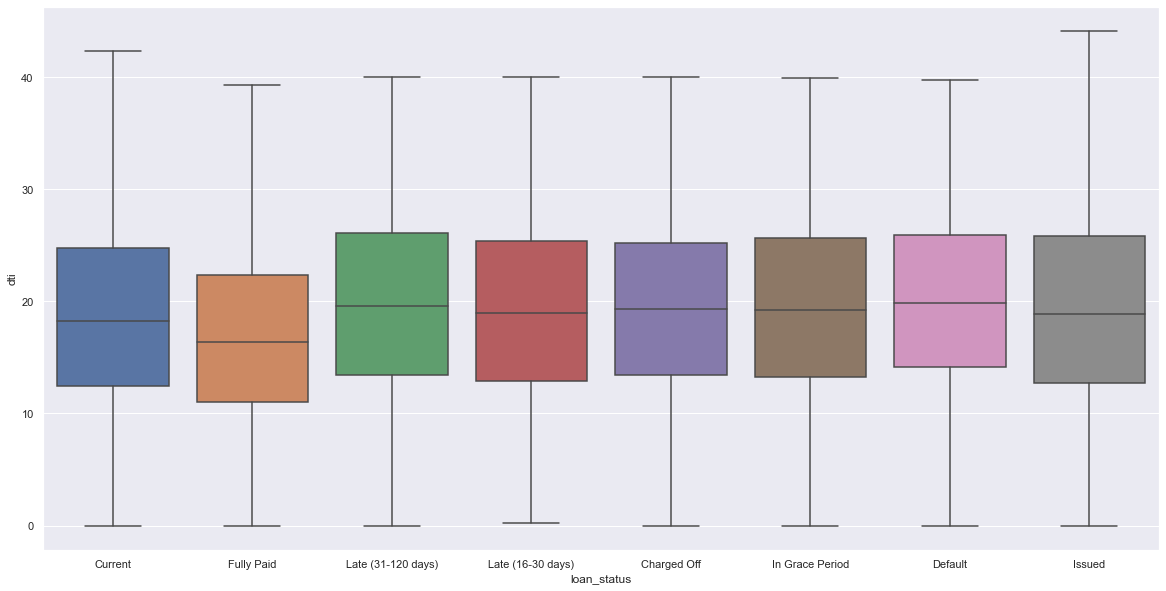

In [22]:
#Box Plot for loan-staus and DTI
sns.boxplot(x="loan_status", y="dti", data=df, showfliers=False)

c:\users\hroha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


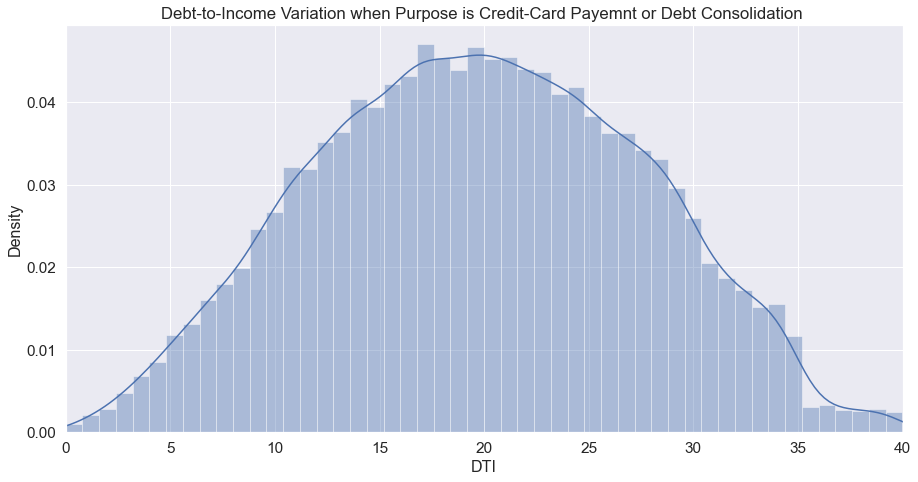

In [25]:
#Analysing Debt-to-Income Variation when Purpose of loan is Credit-Card Payemnt or Debt Consolidation

category=['debt_consolidation', 'credit_card']
risky_loans_DTIplot=risky_loans_df.loc[risky_loans_df['purpose'].isin(category)]
x=risky_loans_DTIplot['dti']
ax = sns.distplot(x)
plt.title("Debt-to-Income Variation when Purpose is Credit-Card Payemnt or Debt Consolidation ")
plt.xlabel('DTI', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xlim(0,40)
plt.gcf()
plt.savefig('DTI_CC_DEBT.png')

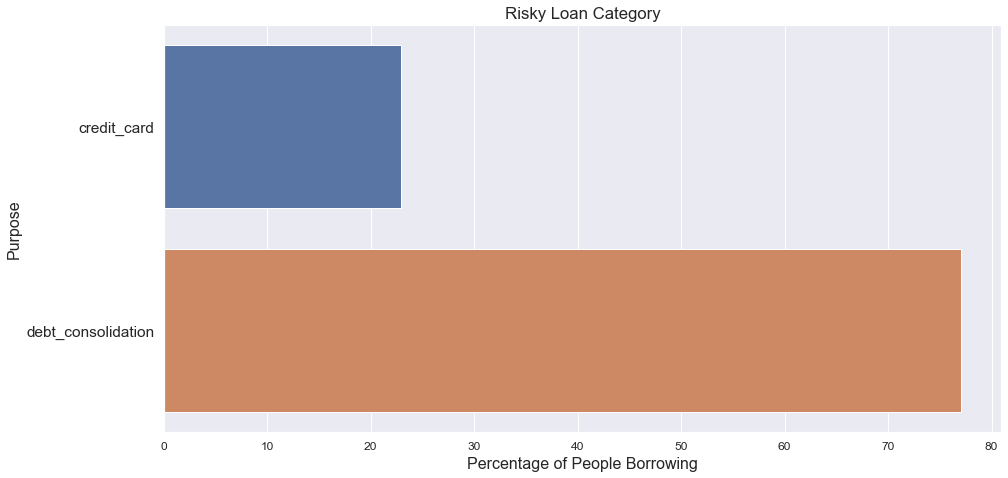

In [26]:
#Analysing Number of people borrowing for Credit Card payment and Debt Consolidation for Risky Loan Category

risky_loan_purpose=non_risky_loans_DTIplot.groupby(['purpose']).size().reset_index(name='count')
risky_loan_purpose['percentage_(%)'] = (risky_loan_purpose['count']/len(non_risky_loans_DTIplot))*100
sns.set(rc ={'figure.figsize':(15,7.5)})
sns.set(font_scale=1.4)
sns.barplot(x = 'percentage_(%)', y = 'purpose', data = risky_loan_purpose)
plt.title('Risky Loan Category')
plt.xticks(fontsize=12)

plt.xlabel('Percentage of People Borrowing', fontsize=16)
plt.ylabel('Purpose', fontsize=16)
plt.gcf()
plt.savefig('CC_DEBT.png')
plt.show()

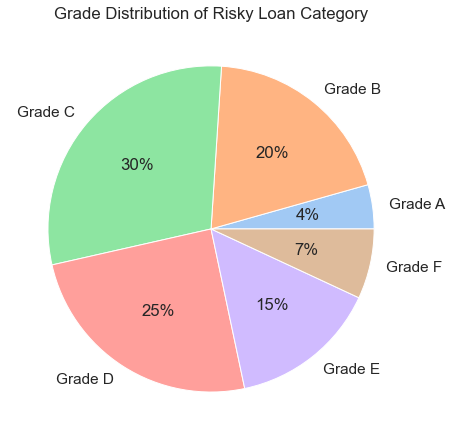

In [27]:
#Grade Distribution of Risky Loan Category

labels = ['Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E', 'Grade F']

A= risky_loans_df.loc[risky_loans_df['grade'] == 'A'].count()[0]
B= risky_loans_df.loc[risky_loans_df['grade'] == 'B'].count()[0]
C= risky_loans_df.loc[risky_loans_df['grade'] == 'C'].count()[0]
D= risky_loans_df.loc[risky_loans_df['grade'] == 'D'].count()[0]
E= risky_loans_df.loc[risky_loans_df['grade'] == 'E'].count()[0]
F= risky_loans_df.loc[risky_loans_df['grade'] == 'F'].count()[0]


data=[A,B,C,D,E,F]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:6]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Grade Distribution of Risky Loan Category")
plt.gcf()
plt.savefig('Grade for Risky.png')

In [13]:
A= risky_loans_df[risky_loans_df['grade'] == 'A']
B= risky_loans_df[risky_loans_df['grade'] == 'B']
C= risky_loans_df[risky_loans_df['grade'] == 'C']
D= risky_loans_df[risky_loans_df['grade'] == 'D']
E= risky_loans_df[risky_loans_df['grade'] == 'E']
F= risky_loans_df[risky_loans_df['grade'] == 'F']

In [ ]:
A= risky_loans_df[risky_loans_df['grade'] == 'A']
B= risky_loans_df[risky_loans_df['grade'] == 'B']
C= risky_loans_df[risky_loans_df['grade'] == 'C']
D= risky_loans_df[risky_loans_df['grade'] == 'D']
E= risky_loans_df[risky_loans_df['grade'] == 'E']
F= risky_loans_df[risky_loans_df['grade'] == 'F']

In [ ]:
['OWN', 'RENT', 'MORTGAGE', 'NONE', 'OTHER', 'ANY']

In [26]:
One= risky_loans_df[risky_loans_df['home_ownership'] == 'OWN']
Two= risky_loans_df[risky_loans_df['home_ownership'] == 'RENT']
Three= risky_loans_df[risky_loans_df['home_ownership'] == 'MORTGAGE']

In [14]:
A.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,1.566000e+03,1.566000e+03,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1.566000e+03,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.0,1566.0,1566.000000,1.566000e+03,1566.000000
mean,1.273809e+07,1.425106e+07,14053.144955,14053.144955,14042.871319,7.903716,434.061807,7.697410e+04,16.934119,0.194125,0.545338,34.351825,71.313842,11.986590,0.085568,16682.644317,43.260473,27.463602,326.294962,326.208914,6084.646590,6079.730619,4522.825179,943.703851,2.233709,615.883870,64.750689,447.045019,0.001916,43.766397,1.0,0.0,136.939974,1.535705e+05,39733.730524
std,1.213024e+07,1.289711e+07,7009.008416,7009.008416,7004.045591,0.887131,217.144958,5.107460e+04,7.572557,0.620721,0.846825,12.791839,8.116205,5.048691,0.345240,18195.973509,22.491748,11.310868,2197.684543,2197.181680,4694.152942,4690.648084,3840.222435,727.250942,9.377178,1261.114435,164.033824,284.653131,0.043741,8.227478,0.0,0.0,2548.958962,1.387496e+05,31397.842528
min,4.045480e+05,4.512760e+05,1000.000000,1000.000000,1000.000000,5.930000,31.300000,1.200000e+04,0.000000,0.000000,0.000000,1.000000,12.000000,2.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.0,0.0,0.000000,0.000000e+00,700.000000
25%,3.526526e+06,4.323859e+06,8400.000000,8400.000000,8400.000000,7.620000,261.182500,4.800000e+04,11.262500,0.000000,0.000000,33.940493,70.271492,8.000000,0.000000,6466.000000,26.125000,19.250000,0.000000,0.000000,2490.562500,2490.562500,1691.505000,395.730000,0.000000,0.000000,0.000000,250.330000,0.000000,44.104838,1.0,0.0,0.000000,3.720175e+04,19000.000000
50%,8.830282e+06,1.043082e+07,12800.000000,12800.000000,12800.000000,7.900000,391.130000,6.800000e+04,16.710000,0.000000,0.000000,33.940493,70.271492,11.000000,0.000000,12642.000000,42.600000,26.000000,0.000000,0.000000,4916.600000,4915.505000,3474.805000,756.090000,0.000000,0.000000,0.000000,392.435000,0.000000,44.104838,1.0,0.0,0.000000,1.243875e+05,31900.000000
75%,1.704261e+07,1.901988e+07,20000.000000,20000.000000,19975.000000,8.900000,608.720000,9.500000e+04,22.460000,0.000000,1.000000,33.940493,70.271492,15.000000,0.000000,21596.250000,58.600000,34.000000,0.000000,0.000000,8411.297500,8411.297500,6300.972500,1313.057500,0.000000,923.417500,14.444775,615.070000,0.000000,44.104838,1.0,0.0,0.000000,2.301028e+05,51500.000000
max,5.835077e+07,6.216950e+07,35000.000000,35000.000000,35000.000000,9.250000,1111.370000,1.300000e+06,39.910000,9.000000,6.000000,82.000000,118.000000,39.000000,6.000000,281951.000000,98.000000,82.000000,33264.560000,33264.560000,26818.240000,26818.240000,22863.730000,4256.120000,130.120000,20502.140000,1335.025300,2777.770000,1.000000,82.000000,1.0,0.0,95806.000000,1.001310e+06,319300.000000


In [16]:
D.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,8.861000e+03,8.861000e+03,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.0,8861.000000,8861.000000,8.861000e+03,8861.000000
mean,1.507066e+07,1.674806e+07,14812.227740,14812.227740,14807.468119,17.931381,453.959718,63754.798885,19.686699,0.336531,1.083625,33.897289,71.009298,11.332807,0.179325,14576.193883,62.074438,24.351089,447.326875,447.175609,5775.766160,5773.869324,2756.737969,2111.065482,2.181899,905.780804,99.588227,474.966912,0.011963,43.691072,1.0,0.005304,146.660986,1.049254e+05,24004.880488
std,1.259054e+07,1.332797e+07,8594.664306,8594.664306,8591.353731,1.216059,252.541623,38852.011870,8.053128,0.917627,1.155468,15.263956,11.197702,4.992427,0.494901,15305.346569,22.182915,11.699544,2792.754213,2791.892150,4856.199774,4854.161497,2798.699045,1931.370299,9.220776,1498.231438,236.254905,709.146326,0.112799,11.003090,0.0,0.080033,1484.140628,1.225332e+05,21762.654008
min,5.716700e+04,1.372250e+05,1000.000000,1000.000000,1000.000000,15.590000,34.970000,7200.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000
25%,5.694927e+06,6.906997e+06,8000.000000,8000.000000,8000.000000,16.990000,277.660000,40000.000000,13.800000,0.000000,0.000000,32.000000,70.271492,8.000000,0.000000,6150.000000,47.100000,16.000000,0.000000,0.000000,2321.670000,2321.670000,937.020000,747.980000,0.000000,0.000000,0.000000,259.350000,0.000000,44.104838,1.0,0.000000,0.000000,2.407500e+04,11100.000000
50%,1.059588e+07,1.244010e+07,13000.000000,13000.000000,13000.000000,17.770000,393.720000,55000.000000,19.690000,0.000000,1.000000,33.940493,70.271492,11.000000,0.000000,11017.000000,64.000000,23.000000,0.000000,0.000000,4407.560000,4407.560000,1939.660000,1532.380000,0.000000,0.000000,0.000000,383.380000,0.000000,44.104838,1.0,0.000000,0.000000,5.188200e+04,18500.000000
75%,2.093968e+07,2.318218e+07,20000.000000,20000.000000,20000.000000,18.850000,584.480000,75000.000000,25.680000,0.000000,2.000000,33.940493,70.271492,14.000000,0.000000,18470.000000,79.500000,31.000000,0.000000,0.000000,7756.870000,7747.510000,3573.550000,2825.660000,0.000000,1393.920000,33.808000,586.500000,0.000000,44.104838,1.0,0.000000,0.000000,1.581890e+05,30350.000000
max,5.861302e+07,6.245376e+07,35000.000000,35000.000000,35000.000000,20.310000,1306.270000,609000.000000,39.920000,17.000000,6.000000,113.000000,119.000000,43.000000,7.000000,451481.000000,129.400000,110.000000,34423.470000,34423.470000,40154.500000,40125.870000,33109.740000,14022.680000,194.370000,25000.290000,4250.049300,33601.000000,2.000000,137.000000,1.0,2.000000,70093.000000,2.238193e+06,544100.000000


In [15]:
F.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,2.480000e+03,2.480000e+03,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.0,2480.000000,2480.000000,2.480000e+03,2480.000000
mean,1.594358e+07,1.762843e+07,18948.840726,18945.020161,18938.870968,24.099238,568.200073,69169.413665,20.029456,0.352016,1.385081,32.903714,71.475768,11.468952,0.163710,15967.210887,65.399771,24.700000,469.665173,469.489653,7138.056565,7135.318464,2161.454923,3535.842411,2.692658,1438.066569,143.340623,602.824206,0.013306,43.323689,1.0,0.009274,121.036694,1.087952e+05,24489.666532
std,1.350438e+07,1.426041e+07,8845.128308,8840.237338,8836.602498,0.779323,258.716030,37991.016001,8.221275,0.851094,1.231765,15.363536,10.347224,5.205251,0.455141,16463.279458,22.652935,12.023152,2994.777016,2993.363895,5787.807212,5784.422779,2357.669415,3073.905385,10.932346,2161.480730,327.927585,1048.322533,0.118074,11.114113,0.0,0.111441,868.095909,1.199996e+05,21465.994468
min,6.575090e+05,8.408760e+05,1000.000000,1000.000000,1000.000000,21.990000,34.360000,10000.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000
25%,5.760106e+06,6.998240e+06,12168.750000,12168.750000,12143.750000,23.430000,376.937500,45902.000000,14.085000,0.000000,0.000000,28.000000,70.271492,8.000000,0.000000,6905.750000,51.100000,16.000000,0.000000,0.000000,2813.962500,2813.962500,670.602500,1188.827500,0.000000,0.000000,0.000000,341.260000,0.000000,44.104838,1.0,0.000000,0.000000,2.843675e+04,11700.000000
50%,1.014531e+07,1.194393e+07,18350.000000,18350.000000,18325.000000,24.080000,552.050000,61056.000000,20.220000,0.000000,1.000000,33.940493,70.271492,11.000000,0.000000,12603.000000,68.300000,23.000000,0.000000,0.000000,5577.375000,5577.375000,1398.125000,2685.300000,0.000000,200.235000,3.183450,523.030000,0.000000,44.104838,1.0,0.000000,0.000000,5.639700e+04,19900.000000
75%,2.436740e+07,2.668025e+07,25000.000000,25000.000000,25000.000000,24.500000,740.052500,82000.000000,26.200000,0.000000,2.000000,33.940493,70.271492,14.000000,0.000000,20795.500000,83.700000,31.000000,0.000000,0.000000,10079.070000,10079.070000,2857.345000,5030.420000,0.000000,2607.180000,44.542100,726.480000,0.000000,44.104838,1.0,0.000000,0.000000,1.598512e+05,31300.000000
max,5.613910e+07,5.980086e+07,35000.000000,35000.000000,35000.000000,25.780000,1382.360000,650000.000000,39.950000,9.000000,6.000000,82.000000,119.000000,41.000000,6.000000,320684.000000,112.900000,98.000000,34073.890000,34073.890000,39773.150000,39773.150000,29384.880000,18492.490000,116.800000,33520.270000,5694.093600,30000.000000,2.000000,115.000000,1.0,2.000000,18366.000000,1.241764e+06,351000.000000


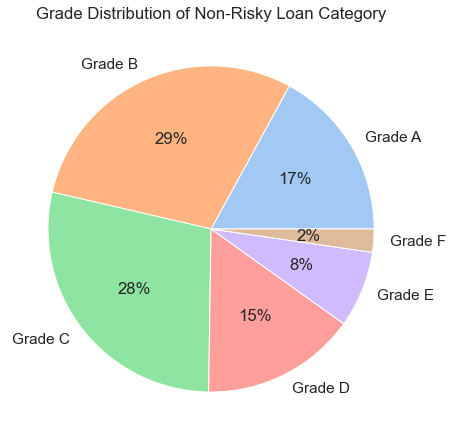

In [28]:
#Grade Distribution of Non-Risky Loan Category

labels = ['Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E', 'Grade F']

A= non_risky_loans_df.loc[non_risky_loans_df['grade'] == 'A'].count()[0]
B= non_risky_loans_df.loc[non_risky_loans_df['grade'] == 'B'].count()[0]
C= non_risky_loans_df.loc[non_risky_loans_df['grade'] == 'C'].count()[0]
D= non_risky_loans_df.loc[non_risky_loans_df['grade'] == 'D'].count()[0]
E= non_risky_loans_df.loc[non_risky_loans_df['grade'] == 'E'].count()[0]
F= non_risky_loans_df.loc[non_risky_loans_df['grade'] == 'F'].count()[0]


data=[A,B,C,D,E,F]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:6]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Grade Distribution of Non-Risky Loan Category")
plt.gcf()
plt.savefig('Grade for Non_Risky.png')

TypeError: boxplot() got an unexpected keyword argument 'xlabel'

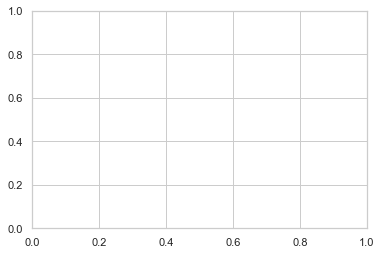

In [22]:
#Total Payment received by the bank based on various loan status

sns.boxplot(x="loan_status", y="total_pymnt",xlabel='Loan Status', ylabel='Total Payment', data=df, showfliers=False)

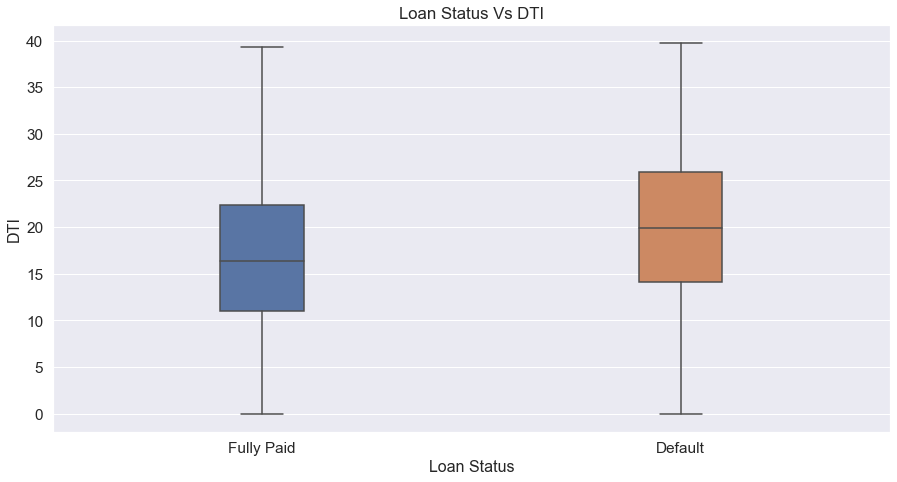

In [31]:
#Box Plot for Loan Status Vs DTI for Fully Paid and Default Loan Category

category=['Fully Paid', 'Default']
category=df.loc[df['loan_status'].isin(category)]
sns.boxplot(x="loan_status", y="dti", data=category, showfliers=False, width=0.2)

plt.title("Loan Status Vs DTI")
plt.xlabel('Loan Status', fontsize=16)
plt.ylabel('DTI', fontsize=16)
plt.gcf()
plt.savefig('Status Vs DTI.png')

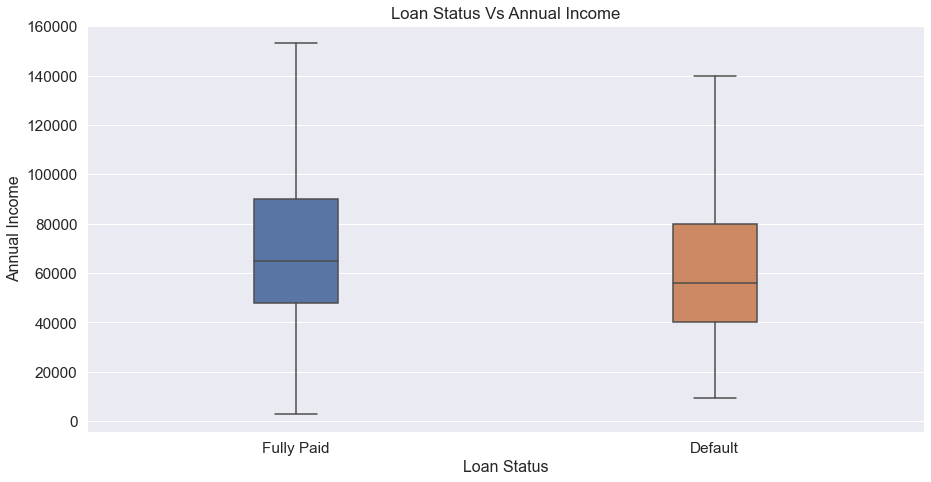

In [32]:
#Box Plot for Loan Status Vs Annual Income for Fully Paid and Default Loan Category
sns.boxplot(x="loan_status", y="annual_inc", data=category, width=0.2, showfliers=False)

plt.title("Loan Status Vs Annual Income")
plt.xlabel('Loan Status', fontsize=16)
plt.ylabel('Annual Income', fontsize=16)
plt.gcf()
plt.savefig('Status Vs Annual.png')

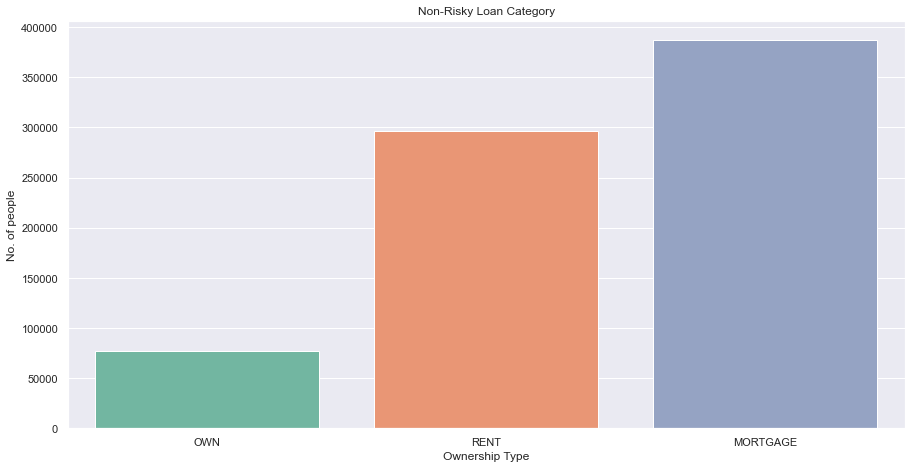

In [56]:
#Number of people VS Home Ownership Status for various loan categories

cat=['OWN', 'RENT', 'MORTGAGE']
risky_loans_home=risky_loans_df.loc[risky_loans_df['home_ownership'].isin(cat)]
non_risky_loans_home=non_risky_loans_df.loc[non_risky_loans_df['home_ownership'].isin(cat)]
moderate_risky_loans_home=moderate_risky_loans_df.loc[moderate_risky_loans_df['home_ownership'].isin(cat)]

#Non-Risky
ax=sns.countplot(x='home_ownership', data=non_risky_loans_home, palette="Set2")
ax.set(xlabel='Ownership Type', ylabel='No. of people')

plt.title("Non-Risky Loan Category")
plt.show()

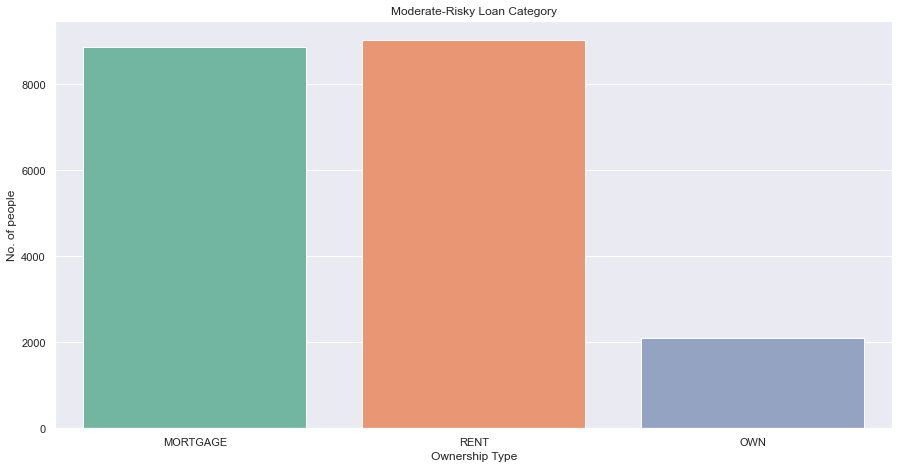

In [57]:
#Risky
ax=sns.countplot(x='home_ownership', data=moderate_risky_loans_home, palette="Set2")
ax.set(xlabel='Ownership Type', ylabel='No. of people')
plt.title("Moderate-Risky Loan Category")
plt.show()

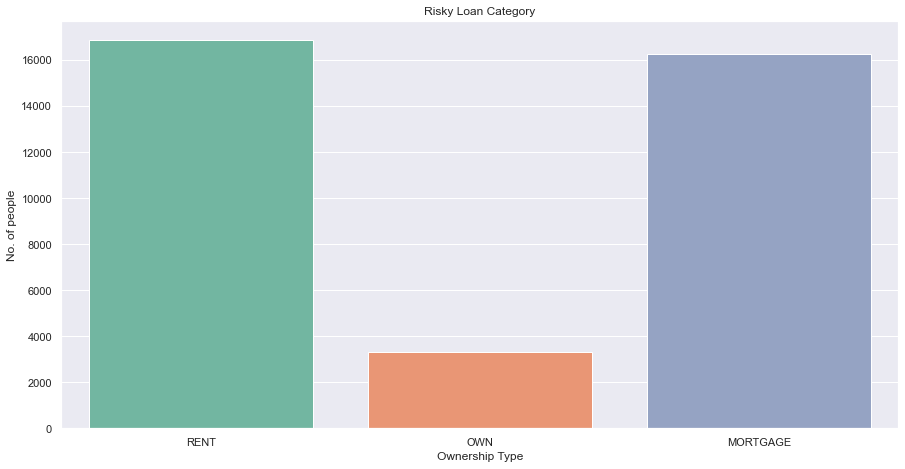

In [58]:
ax=sns.countplot(x='home_ownership', data=risky_loans_home, palette="Set2")
ax.set(xlabel='Ownership Type', ylabel='No. of people')
plt.title("Risky Loan Category")
plt.show()

c:\users\hroha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


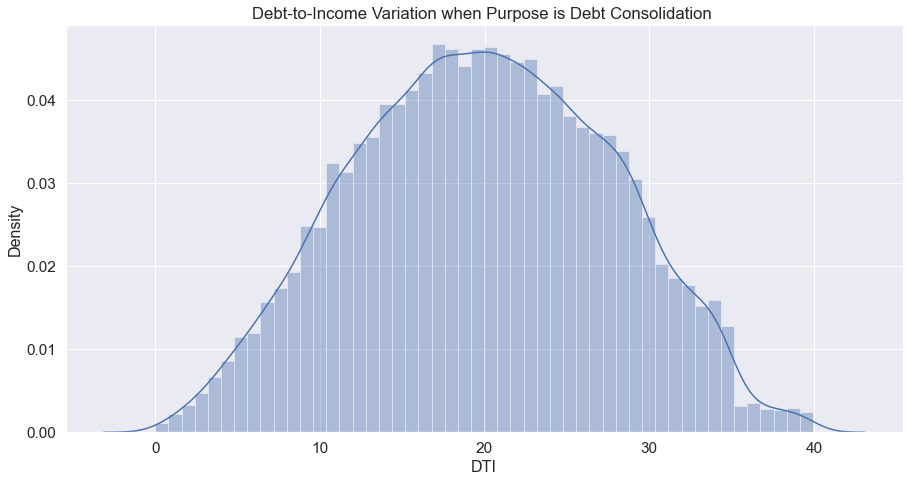

In [36]:
#Analysing Debt-to-income ratio for risky loans when purpose of loan is Debt Consolidation
x=risky_loans_df['dti'].where(risky_loans_df['purpose']=='debt_consolidation')
ax = sns.distplot(x)
plt.title("Debt-to-Income Variation when Purpose is Debt Consolidation ")
plt.xlabel('DTI', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.gcf()
plt.savefig('DTI_DEBT.png')

c:\users\hroha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


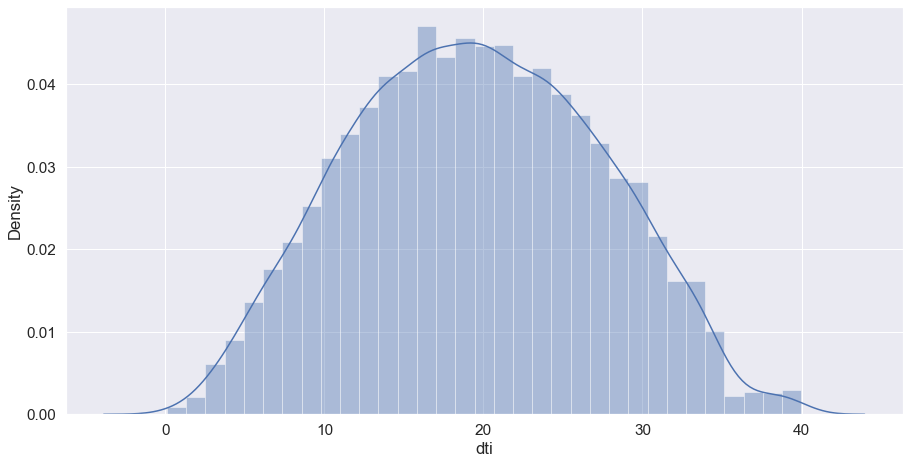

In [38]:
#Analysing Debt-to-income ratio for risky loans when purpose of loan is Credit Card
x=risky_loans_df['dti'].where(risky_loans_df['purpose']=='credit_card')
ax = sns.distplot(x)

c:\users\hroha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


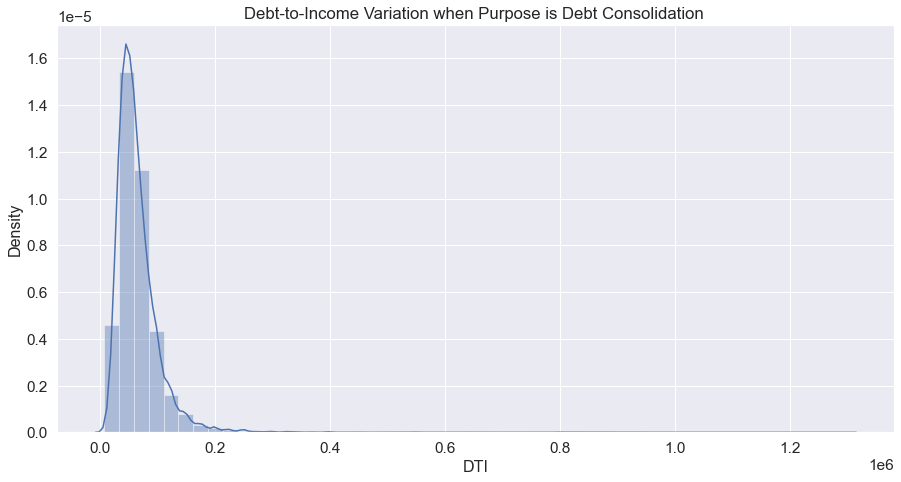

In [37]:
#Analysing Annual Income ratio for risky loans when purpose of loan is Debt Consolidation
x=risky_loans_df['annual_inc'].where(risky_loans_df['purpose']=='debt_consolidation')
ax = sns.distplot(x)
plt.title("Debt-to-Income Variation when Purpose is Debt Consolidation ")
plt.xlabel('DTI', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.gcf()
plt.savefig('DTI_DEBT.png')

c:\users\hroha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


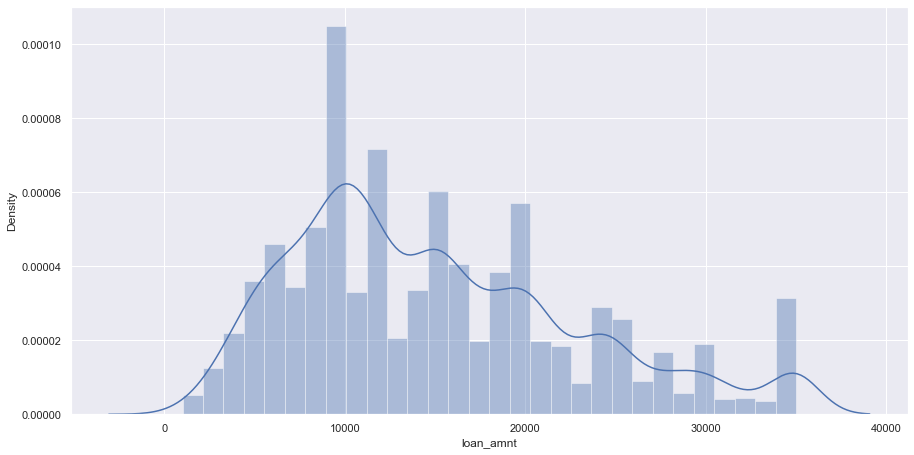

In [39]:
#Loan Amount for risky loans where purpose is credit card
sns.set_theme()
x=risky_loans_df['loan_amnt'].where(risky_loans_df['purpose']=='credit_card')
ax = sns.distplot(x)

c:\users\hroha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


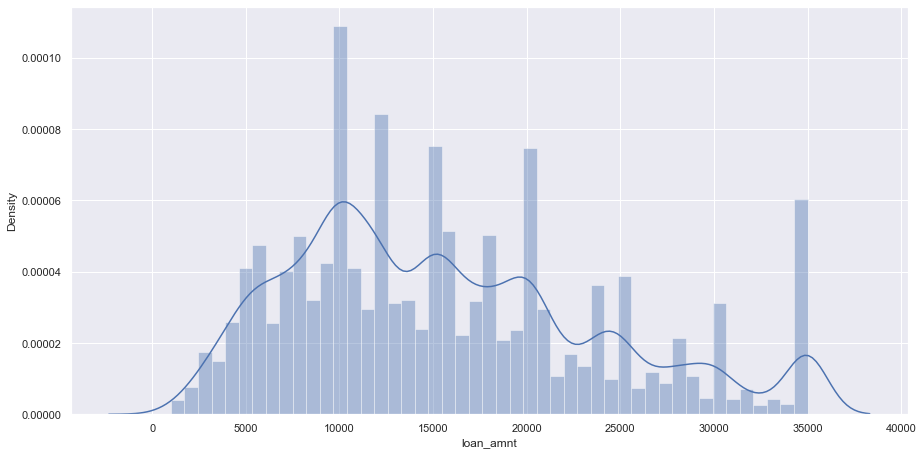

In [40]:
#Loan Amount for risky loans where purpose is debt_consolidation
sns.set_theme()
x=risky_loans_df['loan_amnt'].where(risky_loans_df['purpose']=='debt_consolidation')
ax = sns.distplot(x)

c:\users\hroha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


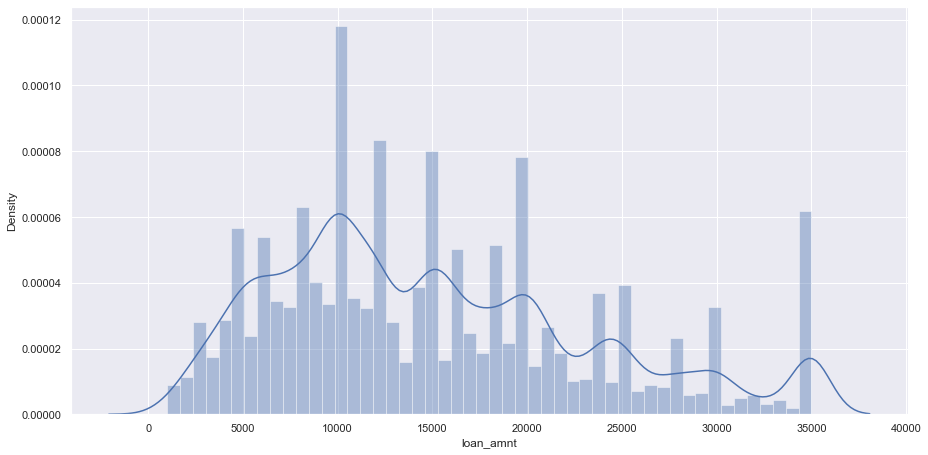

In [41]:
#Loan Amount variation for Risky Loans

sns.set_theme()
x=risky_loans_df['loan_amnt']
ax = sns.distplot(x)

c:\users\hroha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


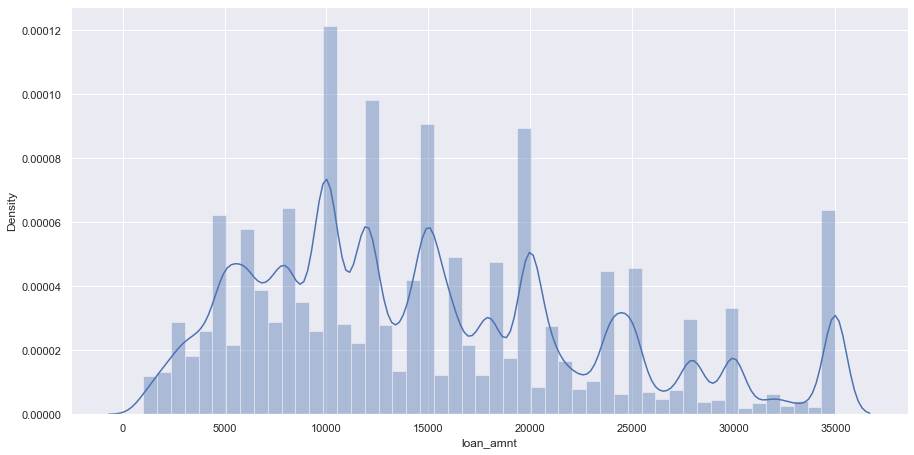

In [42]:
#Loan Amount variation for Non-Risky Loans

sns.set_theme()
x=non_risky_loans_df['loan_amnt']
ax = sns.distplot(x)

c:\users\hroha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


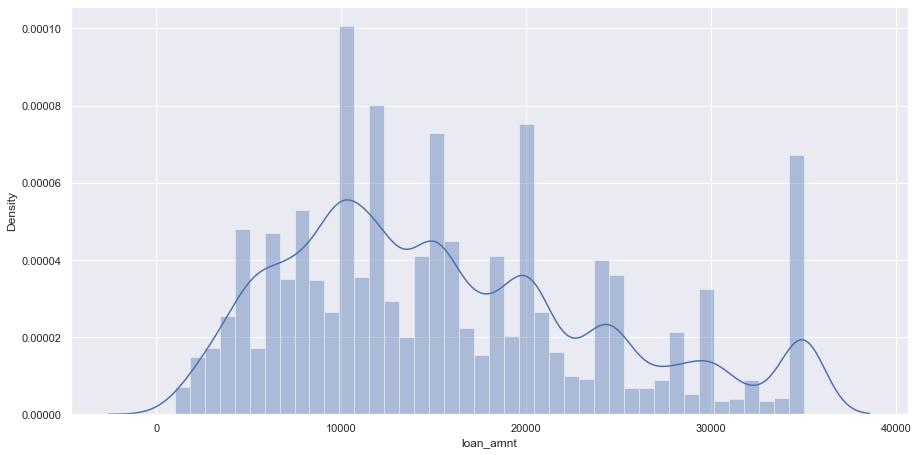

In [43]:
#Loan Amount variation for Moderate Risky Loans

sns.set_theme()
x=moderate_risky_loans_df['loan_amnt']
ax = sns.distplot(x)

In [44]:
#Model Building

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, f1_score

In [45]:
#Categorizing loan-status into risky, moderate and non-risky
risky_loan_category=['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off']
moderate_risky_loan_category=["In Grace Period","Late (16-30 days)","Late (31-120 days)"]
non_risky_loan_category=["Current","Does not meet the credit policy. Status:Fully Paid","Fully Paid","Issued"]
#Creating dataframes for above categories

df.loc[df['loan_status'].isin(risky_loan_category), 'loan_category']=1
df.loc[df['loan_status'].isin(moderate_risky_loan_category), 'loan_category']=2
df.loc[df['loan_status'].isin(non_risky_loan_category), 'loan_category']=3

In [46]:
#Loan Status is dropped ascategories are created

df=df.drop(['loan_status'],axis=1)

#Member_ID and ID are dropped
df=df.drop(['id'],axis=1)
df=df.drop(['member_id'],axis=1)

In [47]:
#Loan Category is dropped for Features
X=df.drop(columns=['loan_category'],axis=1)
# Y is assigned the loan category
Y=df['loan_category']

#defining object type columns
object_columns = df.select_dtypes('object')

In [48]:
# Train and Test Data is Split
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size = 0.25, random_state = 42, stratify = Y)

In [49]:
#Encoding Categorical Features
def category_encoding(columns, X_train, X_test):
    #encoding the categorical data
    encoder = ce.OrdinalEncoder(cols = columns)
    encoder = encoder.fit(X_train)

    X_train_encoded = encoder.transform(X_train)
    X_test_encoded = encoder.transform(X_test)
    
    return X_train_encoded, X_test_encoded

In [50]:
X_train_encoded, X_test_encoded = category_encoding(object_columns, X_train, X_test)

#training, predicting, feature importance 
#We used a Random Forest Model with 100 estimators
model = RandomForestClassifier(n_estimators = 100, verbose = 1)
rf=model.fit(X_train_encoded, y_train) #The model is stored in rf variable

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.6min finished


In [51]:
y_predict = model.predict(X_test_encoded) #Y predict is found using the Test Data

imp_features=rf.feature_importances_ #Extracting Important Features 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished


In [52]:
imp_features = pd.DataFrame(imp_features, index = X_train.columns, columns = ['importance']).sort_values('importance', ascending = False)
print("The 15 important features are",imp_features.head(15)) #Printing important features

The 15 important features are                          importance
last_pymnt_d               0.147778
last_pymnt_amnt            0.102990
total_rec_prncp            0.091612
collection_recovery_fee    0.089033
recoveries                 0.076557
total_pymnt_inv            0.051551
total_pymnt                0.042277
out_prncp_inv              0.034906
out_prncp                  0.028940
next_pymnt_d               0.028792
installment                0.027559
loan_amnt                  0.026124
funded_amnt                0.023291
funded_amnt_inv            0.020734
total_rec_int              0.020286


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
acc = accuracy_score(y_test, y_predict) #Accuracy of the model
print("The accuracy of the model is: " ,acc)  

The accuracy of the model is:  0.9863713798977853


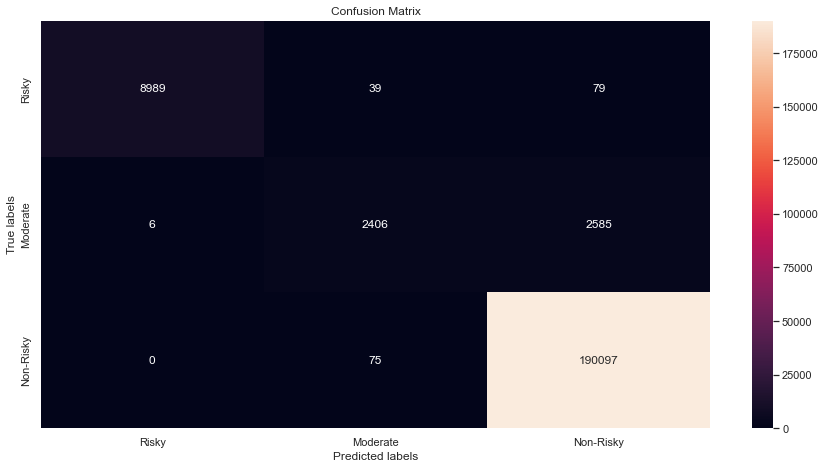

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt     

cm = confusion_matrix(y_test, y_predict) #Confusion Matrix for the model
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Risky', 'Moderate', 'Non-Risky']); ax.yaxis.set_ticklabels(['Risky', 'Moderate', 'Non-Risky']);
plt.gcf()
plt.savefig('Heatmap for Confusion.png')